# Sheet 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## 1 Principal Component Analysis
### a

In [8]:
# TODO: implement PCA (fill in the blanks in the function below)

def pca(data, n_components=None):
    """
    Principal Component Analysis on a p x N data matrix.
    
    Parameters
    ----------
    data : np.ndarray
        Data matrix of shape (p, N).
    n_components : int, optional
        Number of requested components. By default returns all components.
                # ...existing code...
            # sort the eigenvectors by eigenvalue and take the n_components largest ones
            sorted_indices = np.argsort(eigenvalues)[::-1]
        -    components = eigenvectors[:, sorted_indices[:n_components]]
        +    # components should have shape (n_components, p)
        +    components = eigenvectors[:, sorted_indices[:n_components]].T
        -
        -    # compute X_projected, the projection of the data to the components
        -    X_projected = np.dot(components, data)
        +    # compute X_projected, the projection of the data to the components
        +    X_projected = np.dot(components, data)
        # ...existing code...
    Returns
    -------
    np.ndarray, np.ndarray
        the pca components (shape (n_components, p)) and the projection (shape (n_components, N))

    """
    # set n_components to p by default
    n_components = data.shape[0] if n_components is None else n_components
    assert n_components <= data.shape[0], f"Got n_components larger than dimensionality of data!"
    
    # center the data
    for i in range(data.shape[0]):
        data[i, :] = data[i, :] - np.mean(data[i, :])
    
    # compute X times X transpose
    covariance_matrix = np.dot(data, data.T) / data.shape[1]
    
    # compute the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # sort the eigenvectors by eigenvalue and take the n_components largest ones
    sorted_indices = np.argsort(eigenvalues)[::-1]
    
    # components should have shape (n_components, p)
    components = eigenvectors[:, sorted_indices[:n_components]].T

    # compute X_projected, the projection of the data to the components
    X_projected = np.dot(components, data)

    return components, X_projected  # return the n_components first components and the pca projection of the data

In [9]:
# Example data to test your implementation 
# All the asserts on the bottom should go through if your implementation is correct

data = np.array([
    [ 1,  0,  0, -1,  0,  0],
    [ 0,  3,  0,  0, -3,  0],
    [ 0,  0,  5,  0,  0, -5]
], dtype=np.float32)

# add a random offset to all samples. it should not affect the results
data += np.random.randn(data.shape[0], 1)

n_components = 2
components, projection = pca(data, n_components=n_components)  # apply your implementation

# the correct results are known (up to some signs)
true_components = np.array([[0, 0, 1], [0, 1, 0]], dtype=np.float32)
true_projection = np.array([
    [ 0,  0,  5,  0,  0, -5],
    [ 0,  3,  0,  0, -3,  0]
], dtype=np.float32)

# check that components match, up to sign
assert isinstance(components, np.ndarray), f'Expected components to be numpy array but got {type(components)}'
assert components.shape == true_components.shape, f'{components.shape}!={true_components.shape}'
assert np.allclose(np.abs(components * true_components).sum(1), np.ones(n_components)), f'Components not matching'

# check that projections agree, taking into account potentially flipped components
assert isinstance(projection, np.ndarray), f'Expected projection to be numpy array but got {type(projection)}'
assert projection.shape == (n_components, data.shape[1]), f'Incorrect shape of projection: Expected {(n_components, data.shape[1])}, got {projection.shape}'
assert np.allclose(projection, true_projection * (components * true_components).sum(1, keepdims=True), atol=1e-6), f'Projections not matching'

print('Test successful!')

Test successful!


### b
Load the data (it is a subset of the data at https://opendata.cern.ch/record/4910#)

In [ ]:
features = np.load('data/dijet_features.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

print(f'{features.shape=}, {labels.shape=}')  # print the shapes

# TODO: print how many samples of each class are present in the data (hint: numpy.unique)
for label in np.unique(labels):
    count = np.sum(labels == label)
    print(f'Number of samples for class {label_names[label]}: {count}')

features.shape=(116, 2233), labels.shape=(2233,)


Normalize the data

In [17]:
# TODO: report range of features and normalize the data to zero mean and unit variance
print(f'Feature ranges before normalization:')
for i in range(min(5, features.shape[1])):
    print(f' Feature {i}: min={np.min(features[:, i])}, max={np.max(features[:, i])}')

# Determine orientation
print("features.shape:", features.shape)  # expects (n_features, n_samples)

# normalize per-feature (features are rows -> axis=1)
means = features.mean(axis=1, keepdims=True)
stds = features.std(axis=1, keepdims=True)
stds[stds == 0] = 1.0
features = (features - means) / stds

# print ranges per feature (rows)
print('Feature ranges after normalization (first 5 features):')
for i in range(min(5, features.shape[0])):
    print(f' Feature {i}: min={features[i, :].min()}, max={features[i, :].max()}')

Feature ranges before normalization:
 Feature 0: min=-0.4592279817248892, max=4.787228358943785
 Feature 1: min=-0.6914477064924677, max=4.676634682683727
 Feature 2: min=-0.6674846016862941, max=4.482560489961771
 Feature 3: min=-0.7130774180615734, max=4.407529386791421
 Feature 4: min=-0.4812681849615755, max=4.785441054673697
features.shape: (116, 2233)
Feature ranges after normalization (first 5 features):
 Feature 0: min=-3.09684614267106, max=2.815458551590957
 Feature 1: min=-3.0967877268101103, max=2.8152817403835564
 Feature 2: min=-3.0615188128957787, max=2.8185759708630536
 Feature 3: min=-2.3307917296540737, max=7.803051407927059
 Feature 4: min=-1.7549839105891611, max=3.4521469322786733


## 2 Robust PCA

### a

robust_pca data shape: (2, 31)


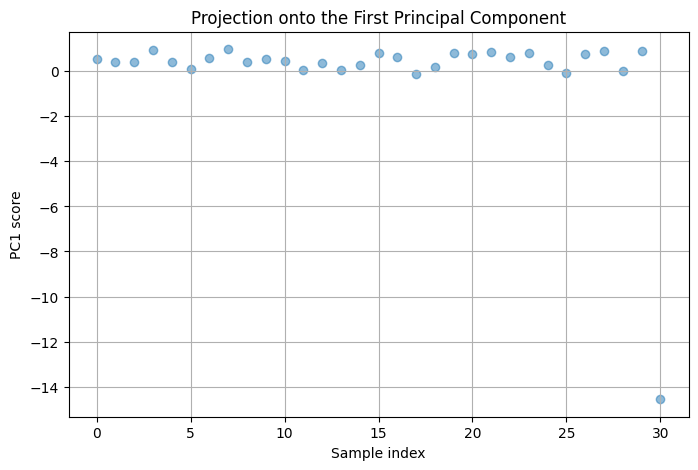

In [28]:
# load data
data = np.load('data/robust_pca_data.npy')
print("robust_pca data shape:", data.shape)

# TODO: Perform standard PCA and plot the first principal component in a scatter plot of the data

# pca expects shape (p, N) = (n_features, n_samples)
# many datasets are (n_samples, n_features) so transpose if needed
if data.shape[0] > data.shape[1]:
    data = data.T

# Perform PCA
components, projection = pca(data, n_components=1)
plt.figure(figsize=(8, 5))
plt.scatter(np.arange(projection.shape[1]), projection[0, :], alpha=0.5)
plt.title('Projection onto the First Principal Component')
plt.xlabel('Sample index')
plt.ylabel('PC1 score')
plt.grid()
plt.show()


### b

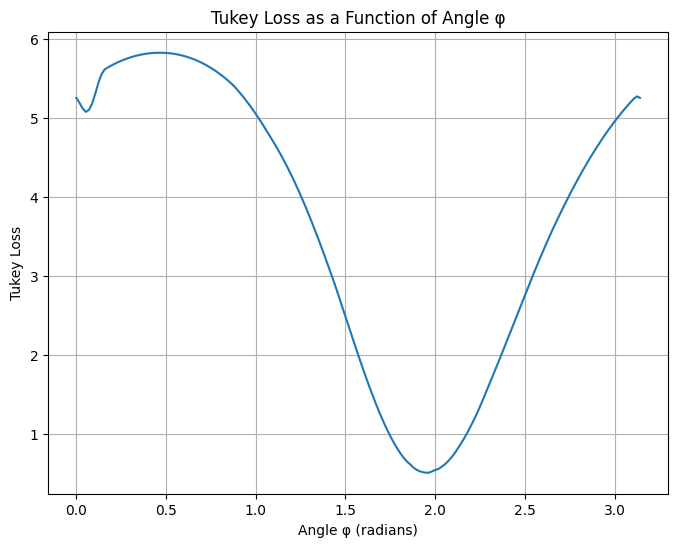

In [35]:
# TODO: Compute the first principal component in a robust way: Use the Tukey potential with the scale
# parameter s = on the distances. Parameterize the line with the angle φ to the x-axis. Plot the error
# as a function of φ. Interpret the two minima.
def tukey_loss(data, phi, s):
    """
    Compute the Tukey loss for projecting data onto a line at angle phi.
    
    Parameters
    ----------
    data : np.ndarray
        Data matrix of shape (2, N).
    phi : float
        Angle of the line in radians.
    s : float
        Scale parameter for the Tukey loss.
    """
    # Compute the projection of the data onto the line
    line = np.array([np.cos(phi), np.sin(phi)])  # unit direction
    projections = line @ data                    # scalar projection of each point
    residuals = projections - np.median(projections)

    # Compute Tukey loss
    r_scaled = residuals / s
    mask = np.abs(residuals) <= s
    rho = np.zeros_like(residuals)
    rho[mask] = (s**2 / 6) * (1 - (1 - r_scaled[mask]**2)**3)
    rho[~mask] = s**2 / 6

    return np.sum(rho)

# Ensure data is 2D for this example
if data.shape[0] != 2:
    raise ValueError("Data must be 2D for Tukey loss computation.")

# robust scale parameter
phi0 = 0
line0 = np.array([np.cos(phi0), np.sin(phi0)])
proj0 = line0 @ data
s = 1.5 # given

# compute loss over angles
phis = np.linspace(0, np.pi, 180)
losses = [tukey_loss(data, phi, s) for phi in phis]

# Plot the Tukey loss as a function of angle φ
plt.figure(figsize=(8,6))
plt.plot(phis, losses)
plt.title('Tukey Loss as a Function of Angle φ')
plt.xlabel('Angle φ (radians)')
plt.ylabel('Tukey Loss')
plt.grid()
plt.show()



### c

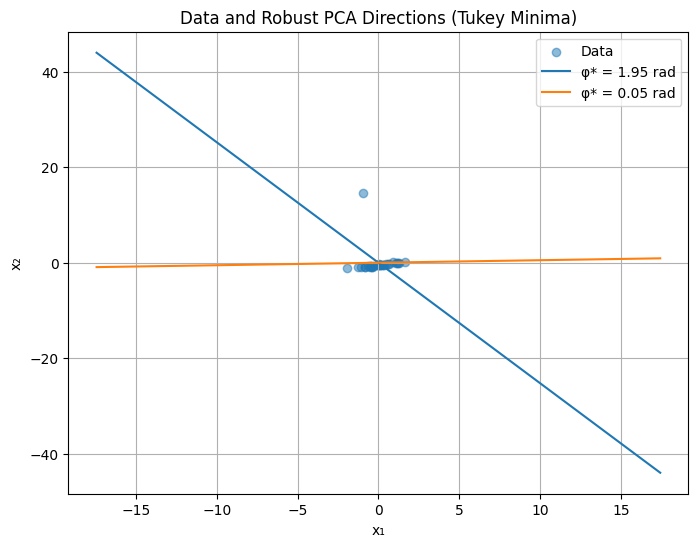

In [ ]:
# TODO: Plot the potential in the scatter plot for the two minima $\varphi^*$.
from scipy.signal import find_peaks

# Find local minima
minima_indices, _ = find_peaks(-np.array(losses))
phi_stars = phis[minima_indices]

# Sort by actual loss value to find the most significant ones
phi_stars = phi_stars[np.argsort(np.array(losses)[minima_indices])[:2]]

# plot data
plt.figure(figsize=(8, 6))
plt.scatter(data[0, :], data[1, :], alpha=0.5, label='Data')

# plot the two minimizing directions
for phi in phi_stars:
    line = np.array([np.cos(phi), np.sin(phi)])
    x_vals = np.linspace(-1.2, 1.2, 10) * np.max(np.abs(data))
    y_vals = (line[1]/line[0]) * x_vals
    plt.plot(x_vals, y_vals, label=f'φ* = {phi:.2f} rad')

plt.title('Data and Robust PCA Directions (Tukey Minima)')
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.legend()
plt.grid()
plt.show()
